<a href="https://colab.research.google.com/github/moh1t-do/machine-failure-prediction/blob/main/notebook/Machine_Failure_Prediction_using_Sensor_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from scipy.stats import chi2_contingency

# Data Loading

This dataset contains sensor data collected from various machines, with the aim of predicting machine failures in advance. It includes a variety of sensor readings as well as the recorded machine failures.

Columns Description footfall: The number of people or objects passing by the machine. tempMode: The temperature mode or setting of the machine. AQ: Air quality index near the machine. USS: Ultrasonic sensor data, indicating proximity measurements. CS: Current sensor readings, indicating the electrical current usage of the machine. VOC: Volatile organic compounds level detected near the machine. RP: Rotational position or RPM (revolutions per minute) of the machine parts. IP: Input pressure to the machine. Temperature: The operating temperature of the machine. fail: Binary indicator of machine failure (1 for failure, 0 for no failure)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/moh1t-do/machine-failure-prediction/refs/heads/main/sensor%20data/data.csv')
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


# EDA

## UNIVARIANT ANALYSIS

### Histograms - Continuous Data

<Axes: xlabel='footfall', ylabel='Count'>

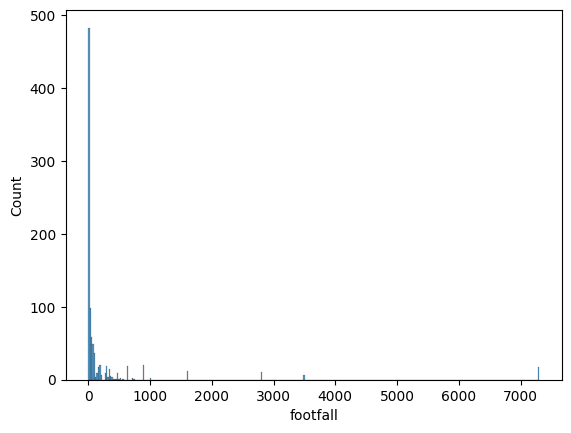

In [ ]:
sns.histplot(data=df,x='footfall')

<Axes: xlabel='tempMode', ylabel='Count'>

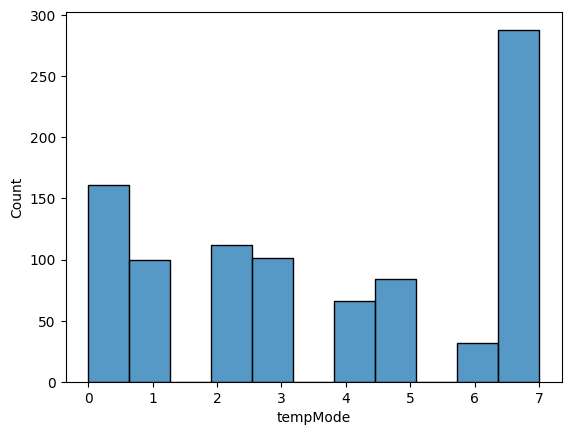

In [ ]:
sns.histplot(data=df,x='tempMode')

<Axes: xlabel='AQ', ylabel='Count'>

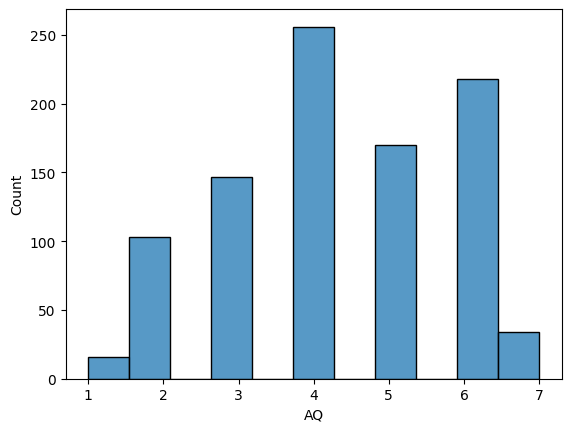

In [ ]:
sns.histplot(data=df,x='AQ')

<Axes: xlabel='USS', ylabel='Count'>

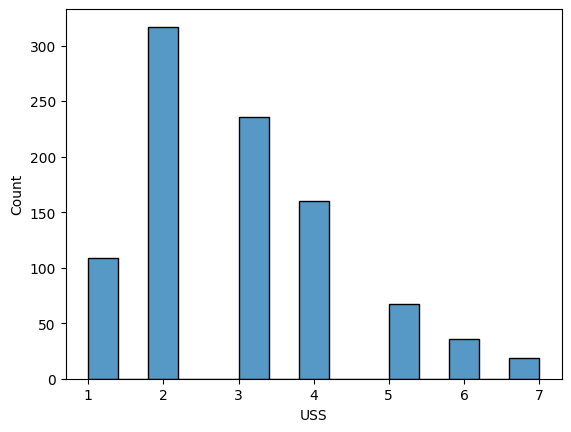

In [ ]:
sns.histplot(data=df,x='USS')

<Axes: xlabel='CS', ylabel='Count'>

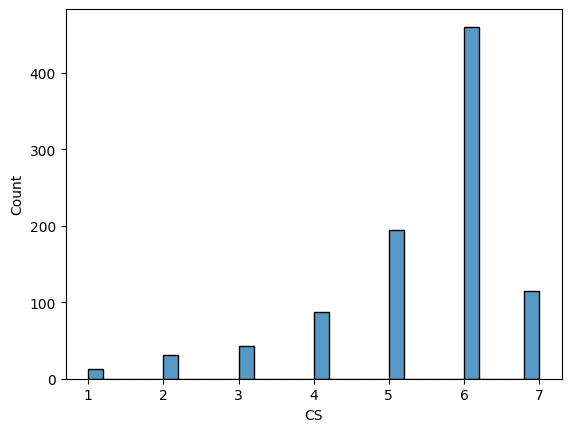

In [ ]:
sns.histplot(data=df,x='CS')

<Axes: xlabel='VOC', ylabel='Count'>

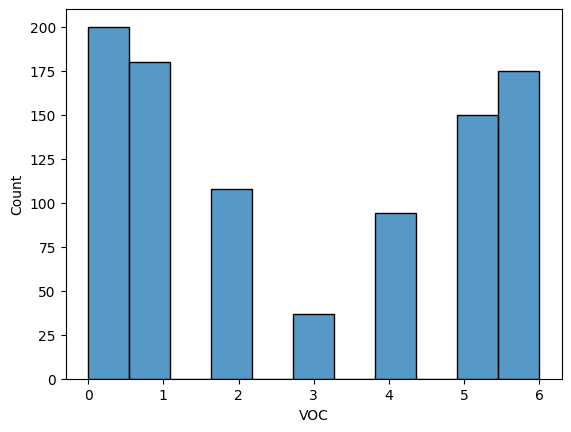

In [ ]:
sns.histplot(data=df,x='VOC')

<Axes: xlabel='RP', ylabel='Count'>

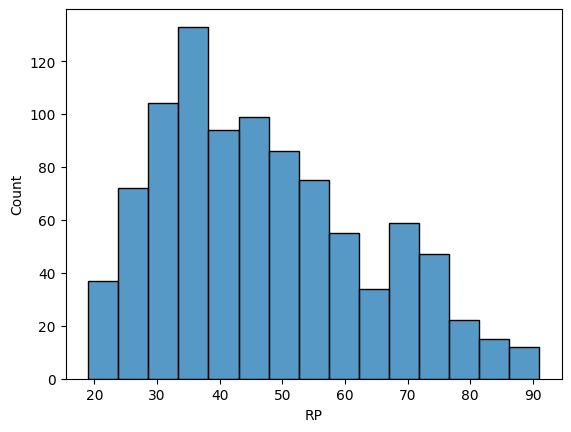

In [ ]:
sns.histplot(data=df,x='RP')

<Axes: xlabel='Temperature', ylabel='Count'>

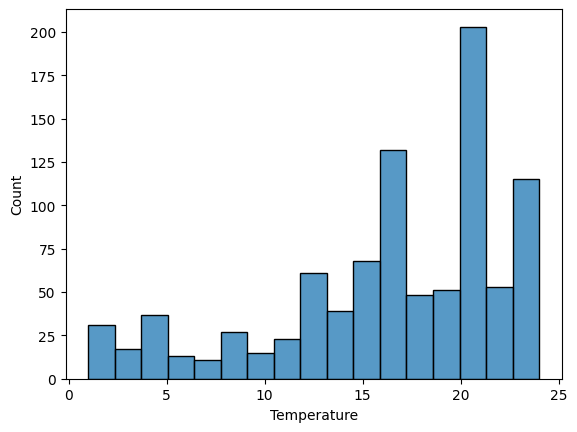

In [ ]:
sns.histplot(data=df,x='Temperature')

<Axes: xlabel='fail', ylabel='Count'>

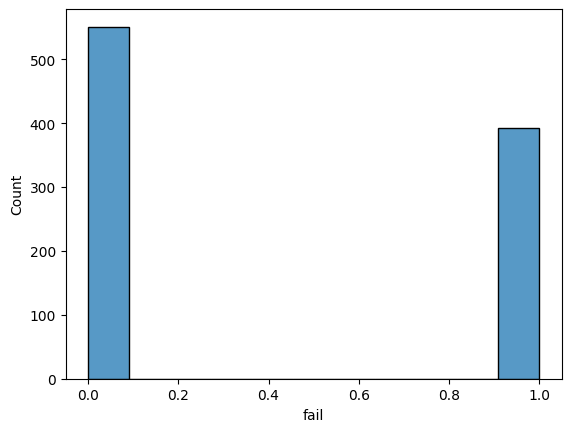

In [ ]:
sns.histplot(data=df,x='fail')

### Box Plot - Continuous Data

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='footfall'>

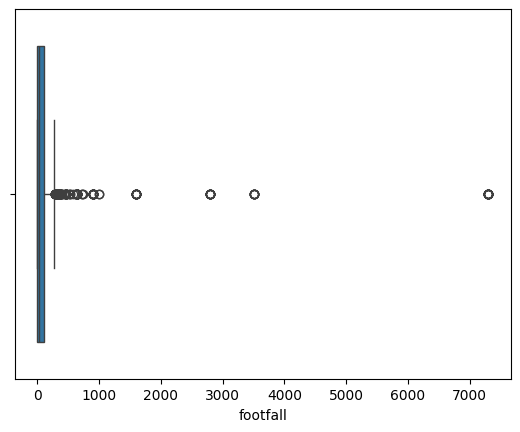

In [ ]:
sns.boxplot(data=df,x='footfall')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='tempMode'>

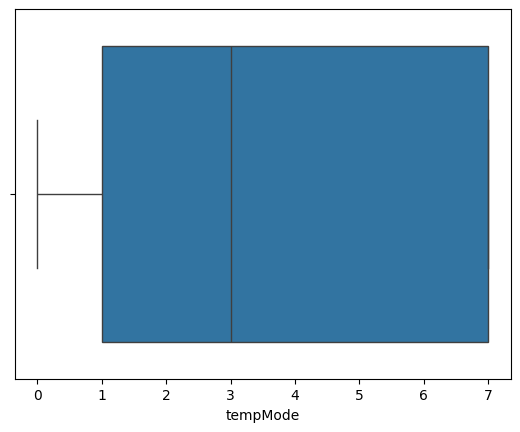

In [ ]:
sns.boxplot(data=df,x='tempMode')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='AQ'>

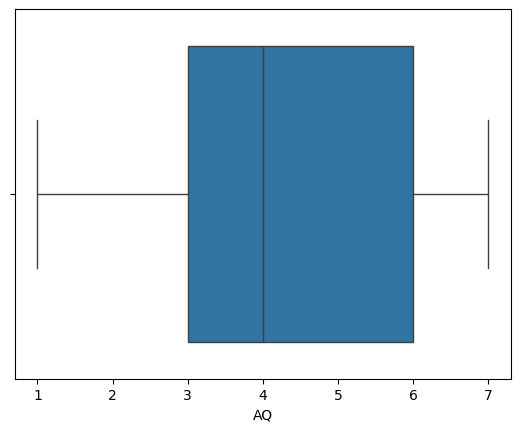

In [ ]:
sns.boxplot(data=df,x='AQ')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='USS'>

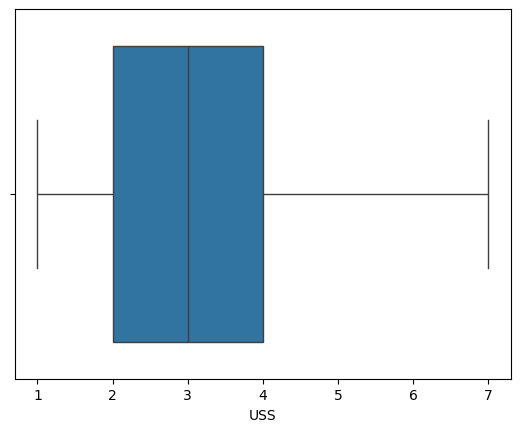

In [ ]:
sns.boxplot(data=df,x='USS')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='CS'>

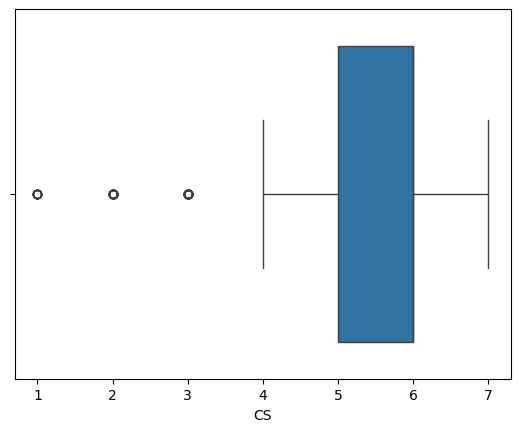

In [ ]:
sns.boxplot(data=df,x='CS')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='VOC'>

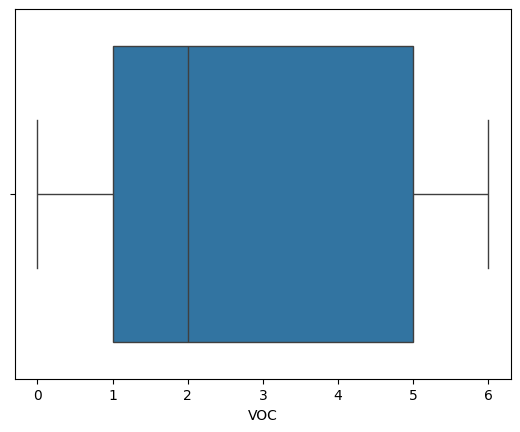

In [ ]:
sns.boxplot(data=df,x='VOC')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='RP'>

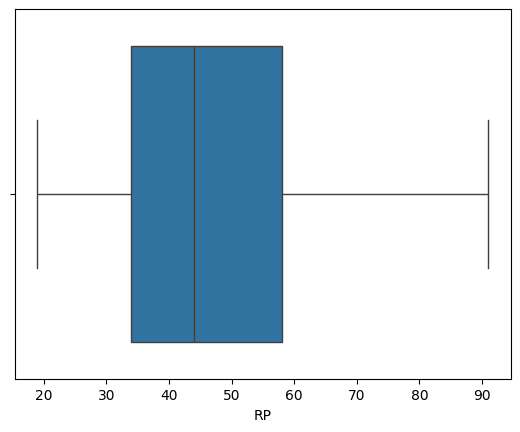

In [ ]:
sns.boxplot(data=df,x='RP')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='IP'>

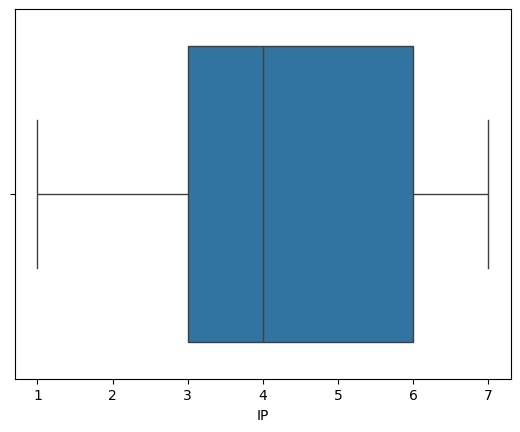

In [ ]:
sns.boxplot(data=df,x='IP')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Temperature'>

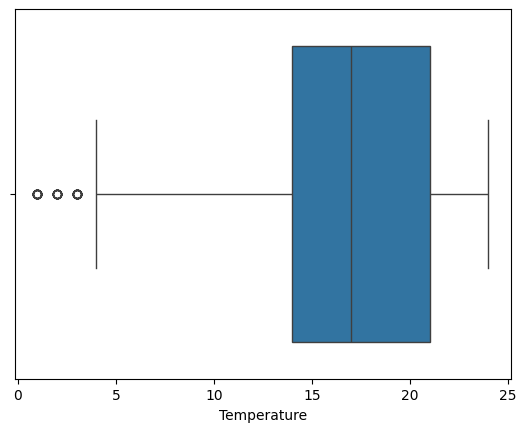

In [ ]:
sns.boxplot(data=df,x='Temperature')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='fail'>

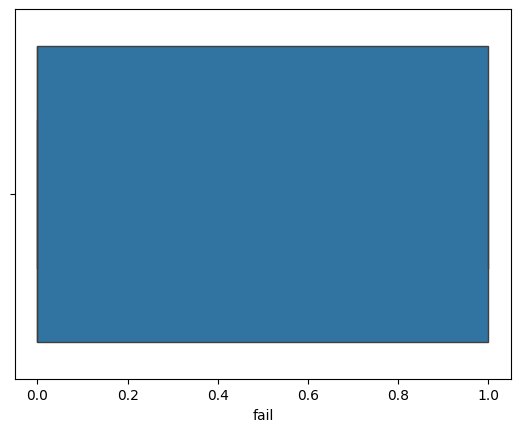

In [ ]:
sns.boxplot(data=df,x='fail')

## Bi-variant Analysis

### Box Plot - Between numerical var and categorical var

<Axes: xlabel='fail', ylabel='footfall'>

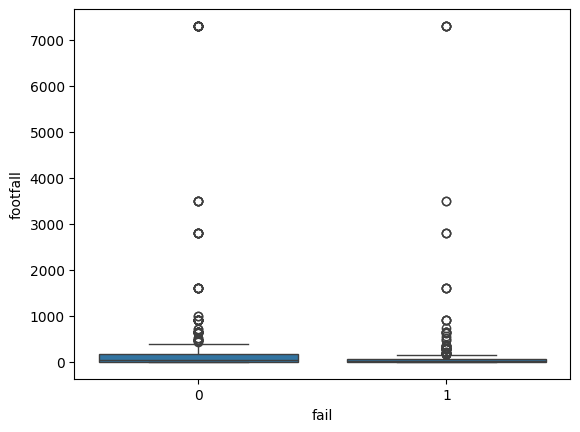

In [ ]:
sns.boxplot(data=df,y='footfall',x='fail')

<Axes: xlabel='fail', ylabel='tempMode'>

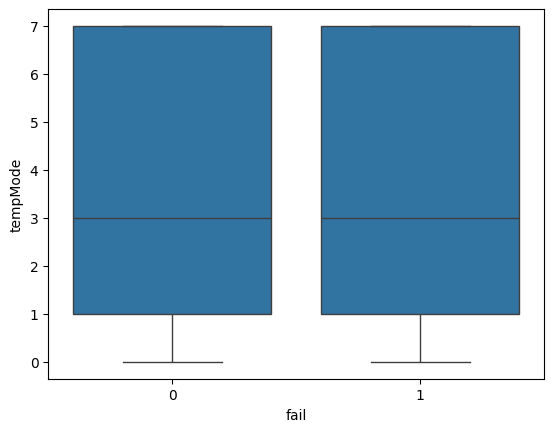

In [ ]:
sns.boxplot(data=df,y='tempMode',x='fail')

<Axes: xlabel='fail', ylabel='AQ'>

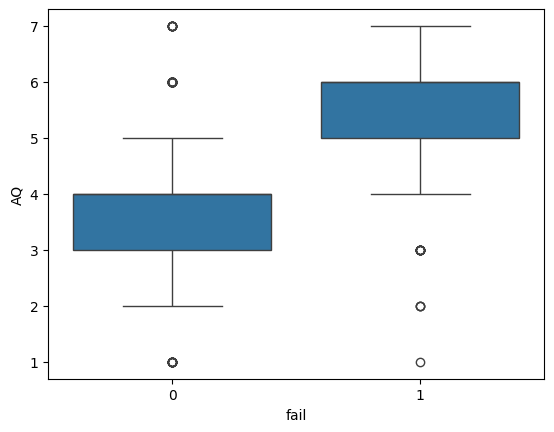

In [ ]:
sns.boxplot(data=df,y='AQ',x='fail')

<Axes: xlabel='fail', ylabel='USS'>

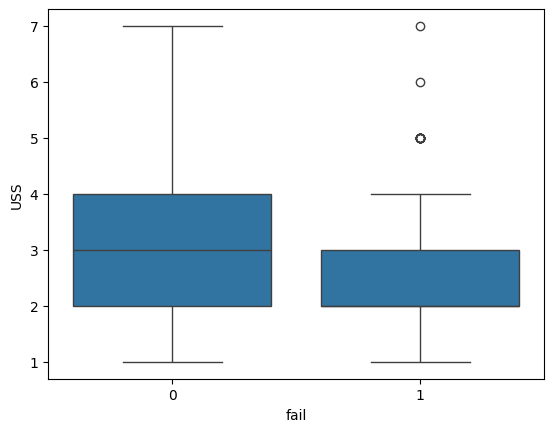

In [ ]:
sns.boxplot(data=df,y='USS',x='fail')

<Axes: xlabel='fail', ylabel='CS'>

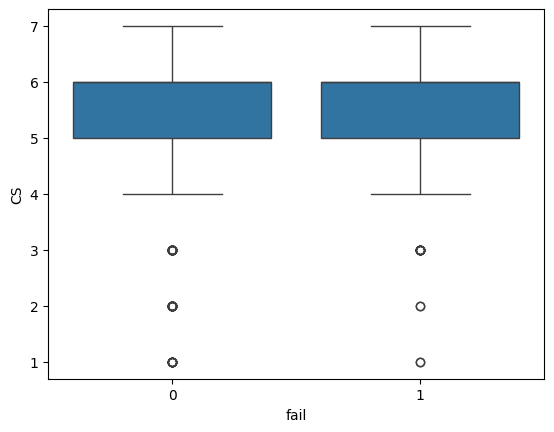

In [ ]:
sns.boxplot(data=df,y='CS',x='fail')

<Axes: xlabel='fail', ylabel='VOC'>

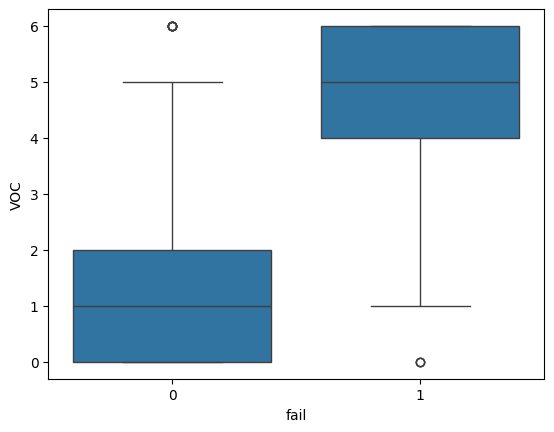

In [ ]:
sns.boxplot(data=df,y='VOC',x='fail')

<Axes: xlabel='fail', ylabel='RP'>

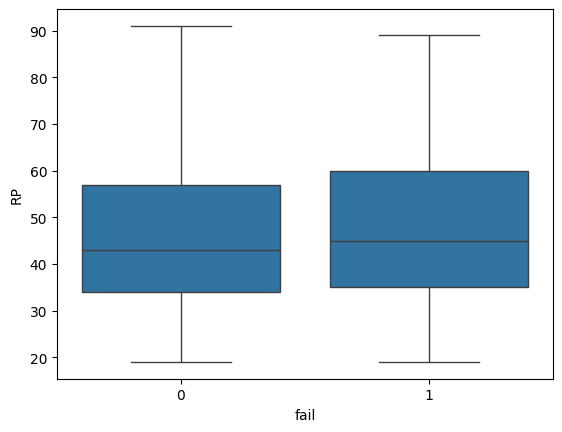

In [ ]:
sns.boxplot(data=df,y='RP',x='fail')

<Axes: xlabel='fail', ylabel='IP'>

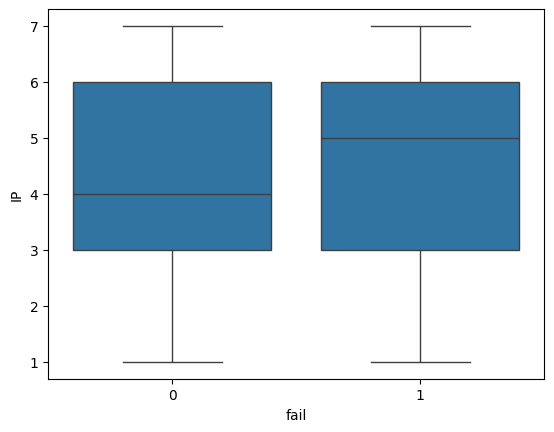

In [ ]:
sns.boxplot(data=df,y='IP',x='fail')

<Axes: xlabel='Temperature', ylabel='fail'>

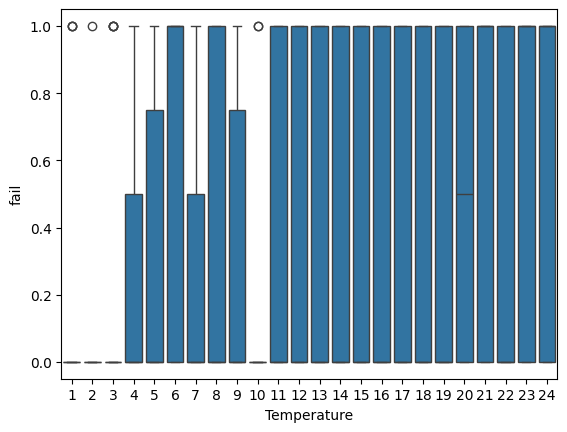

In [ ]:
sns.boxplot(data=df,x='Temperature',y='fail')

In [ ]:
df.columns

Index(['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP',
       'Temperature', 'fail'],
      dtype='object')

In [ ]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


### Scatter plot Between two numerical variables

<Axes: xlabel='tempMode', ylabel='footfall'>

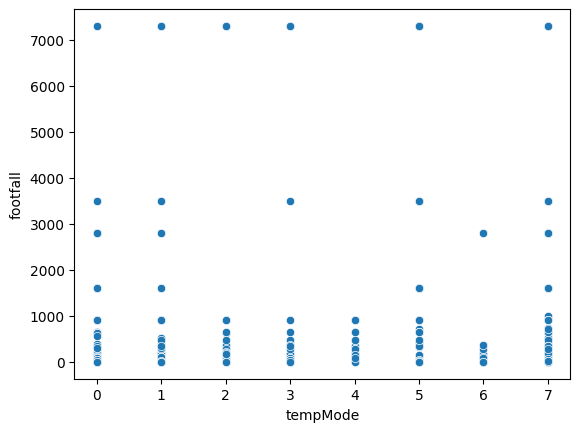

In [ ]:
sns.scatterplot(data=df,y='footfall',x='tempMode')

<Axes: xlabel='AQ', ylabel='footfall'>

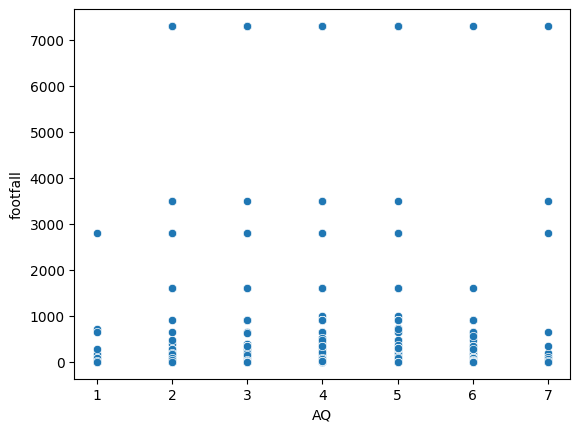

In [ ]:
sns.scatterplot(data=df,y='footfall',x='AQ')

<Axes: xlabel='USS', ylabel='footfall'>

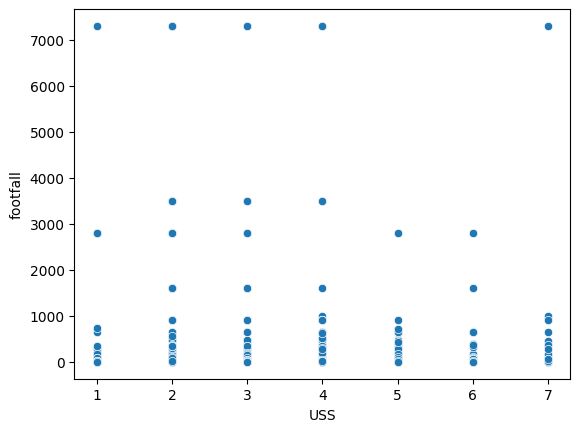

In [ ]:
sns.scatterplot(data=df,y='footfall',x='USS')

<Axes: xlabel='CS', ylabel='footfall'>

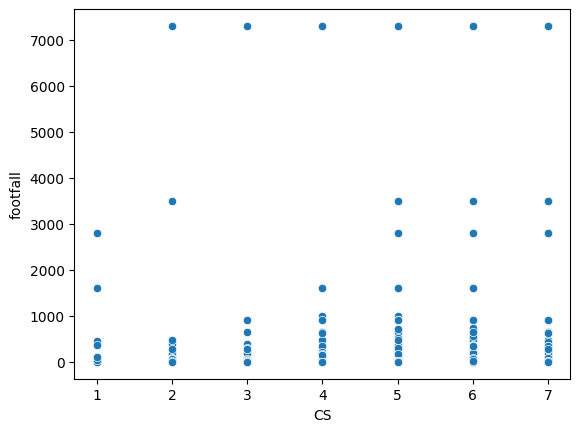

In [ ]:
sns.scatterplot(data=df,y='footfall',x='CS')

<Axes: xlabel='VOC', ylabel='footfall'>

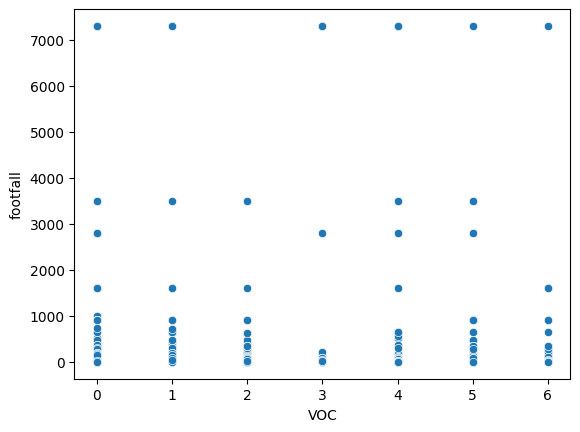

In [ ]:
sns.scatterplot(data=df,y='footfall',x='VOC')

<Axes: xlabel='RP', ylabel='footfall'>

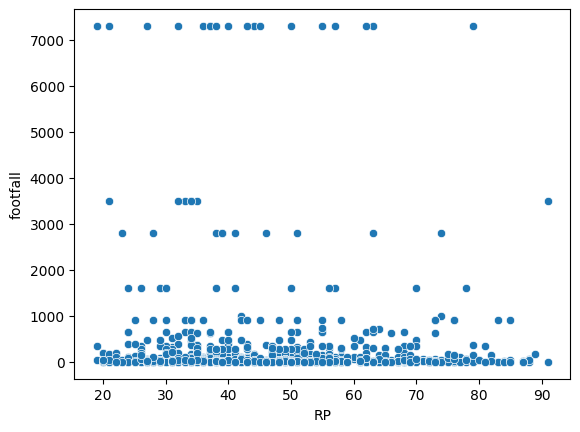

In [ ]:
sns.scatterplot(data=df,y='footfall',x='RP')

<Axes: xlabel='IP', ylabel='footfall'>

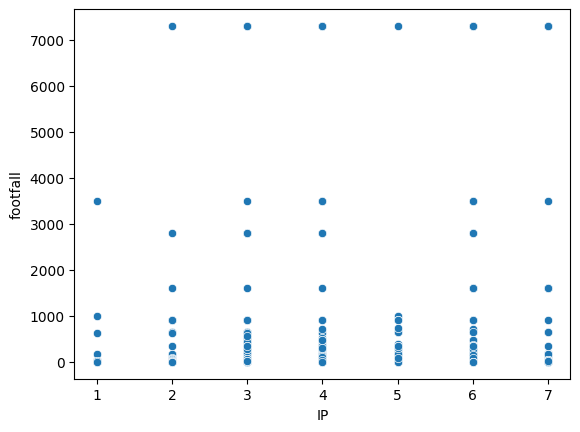

In [ ]:
sns.scatterplot(data=df,y='footfall',x='IP')

<Axes: xlabel='AQ', ylabel='tempMode'>

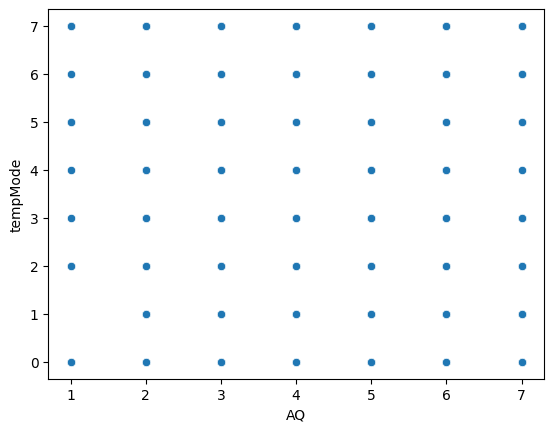

In [ ]:
sns.scatterplot(data=df,y='tempMode',x='AQ')

<Axes: xlabel='CS', ylabel='tempMode'>

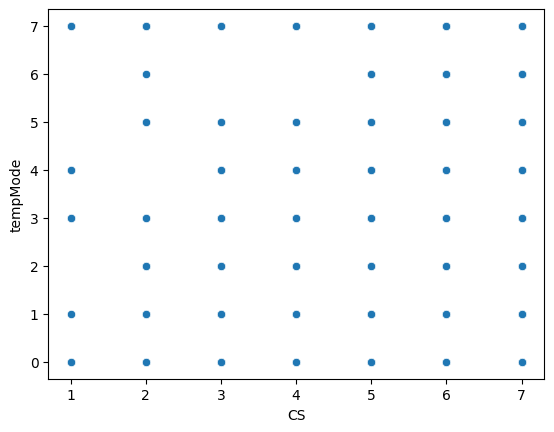

In [ ]:
sns.scatterplot(data=df,y='tempMode',x='CS')

<Axes: xlabel='Temperature', ylabel='footfall'>

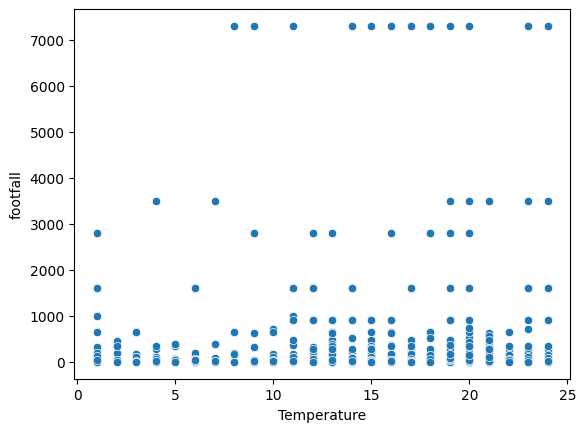

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='footfall')

<Axes: xlabel='Temperature', ylabel='tempMode'>

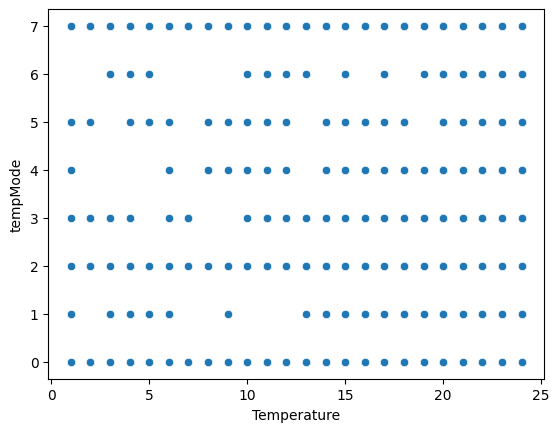

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='tempMode')

<Axes: xlabel='Temperature', ylabel='AQ'>

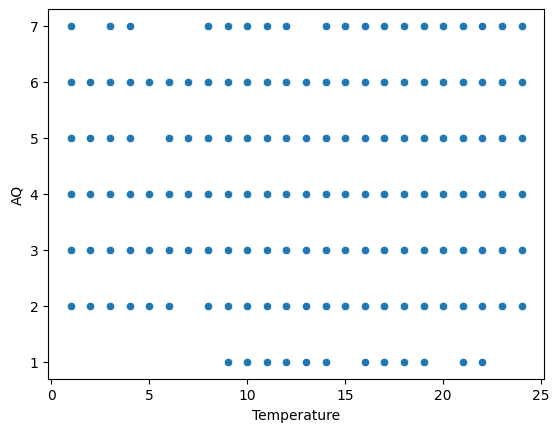

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='AQ')

<Axes: xlabel='Temperature', ylabel='USS'>

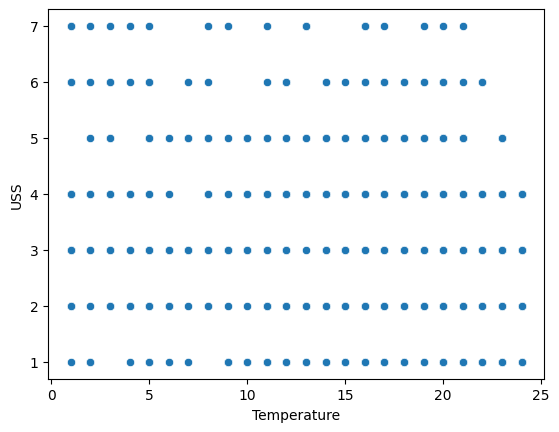

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='USS')

<Axes: xlabel='Temperature', ylabel='CS'>

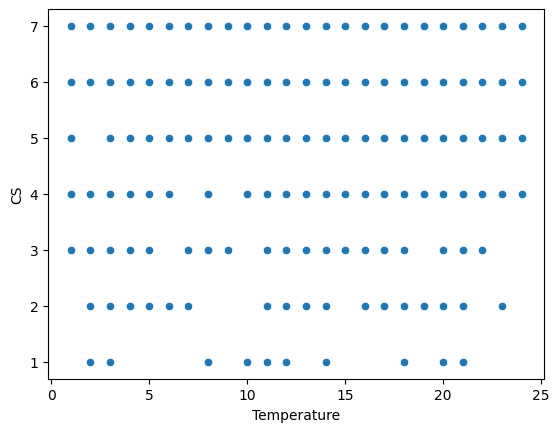

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='CS')

<Axes: xlabel='Temperature', ylabel='VOC'>

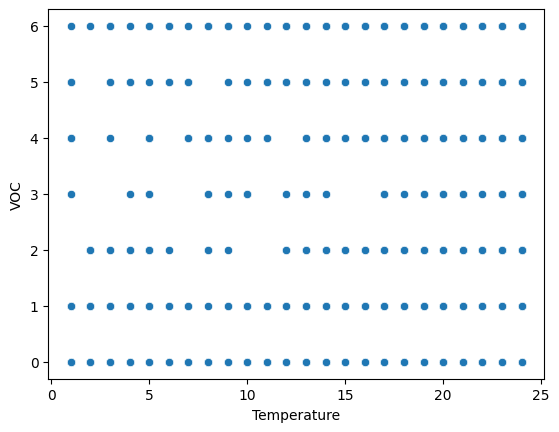

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='VOC')

<Axes: xlabel='Temperature', ylabel='RP'>

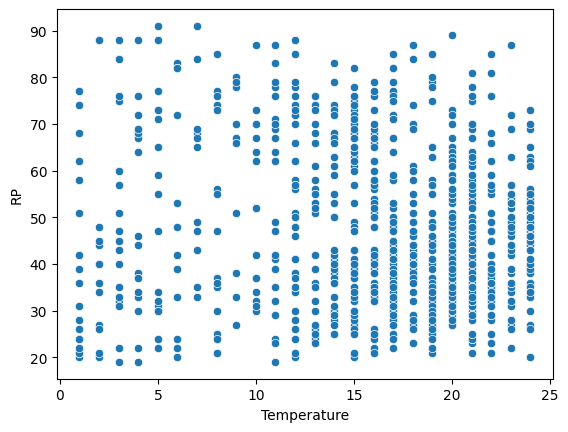

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='RP')

<Axes: xlabel='Temperature', ylabel='IP'>

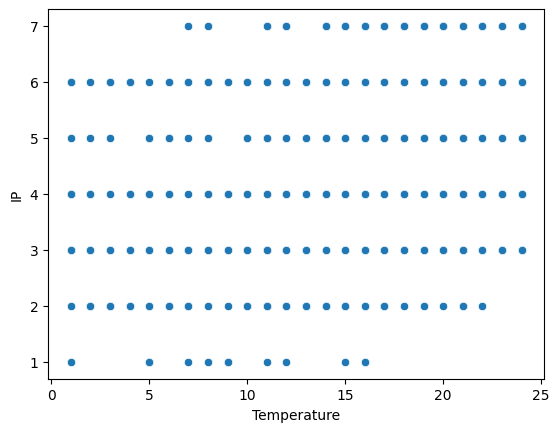

In [ ]:
sns.scatterplot(data=df,x='Temperature',y='IP')

In [ ]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


## Multi-Variant Analysis

In [1]:
sns.pairplot(df,hue='fail')

NameError: name 'sns' is not defined

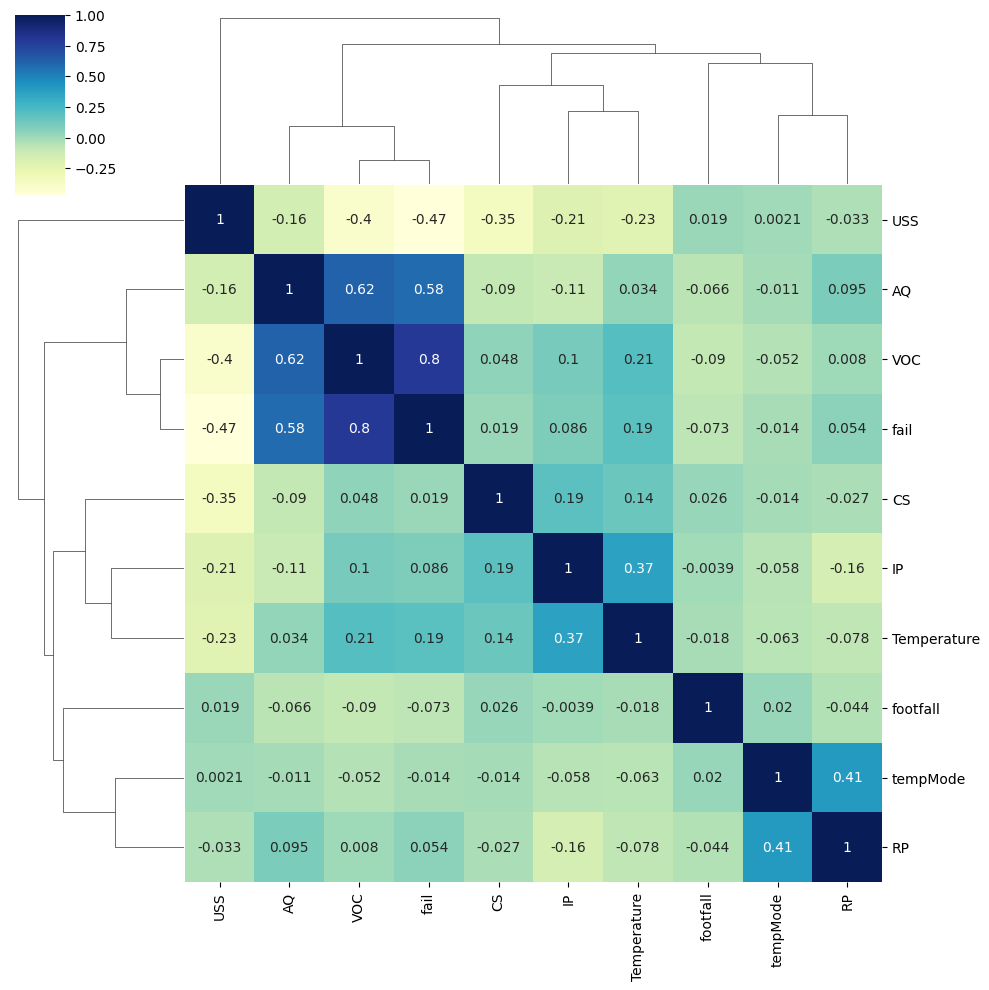

In [ ]:
sns.clustermap(df.corr(), cmap='YlGnBu', annot=True)

<Axes: >

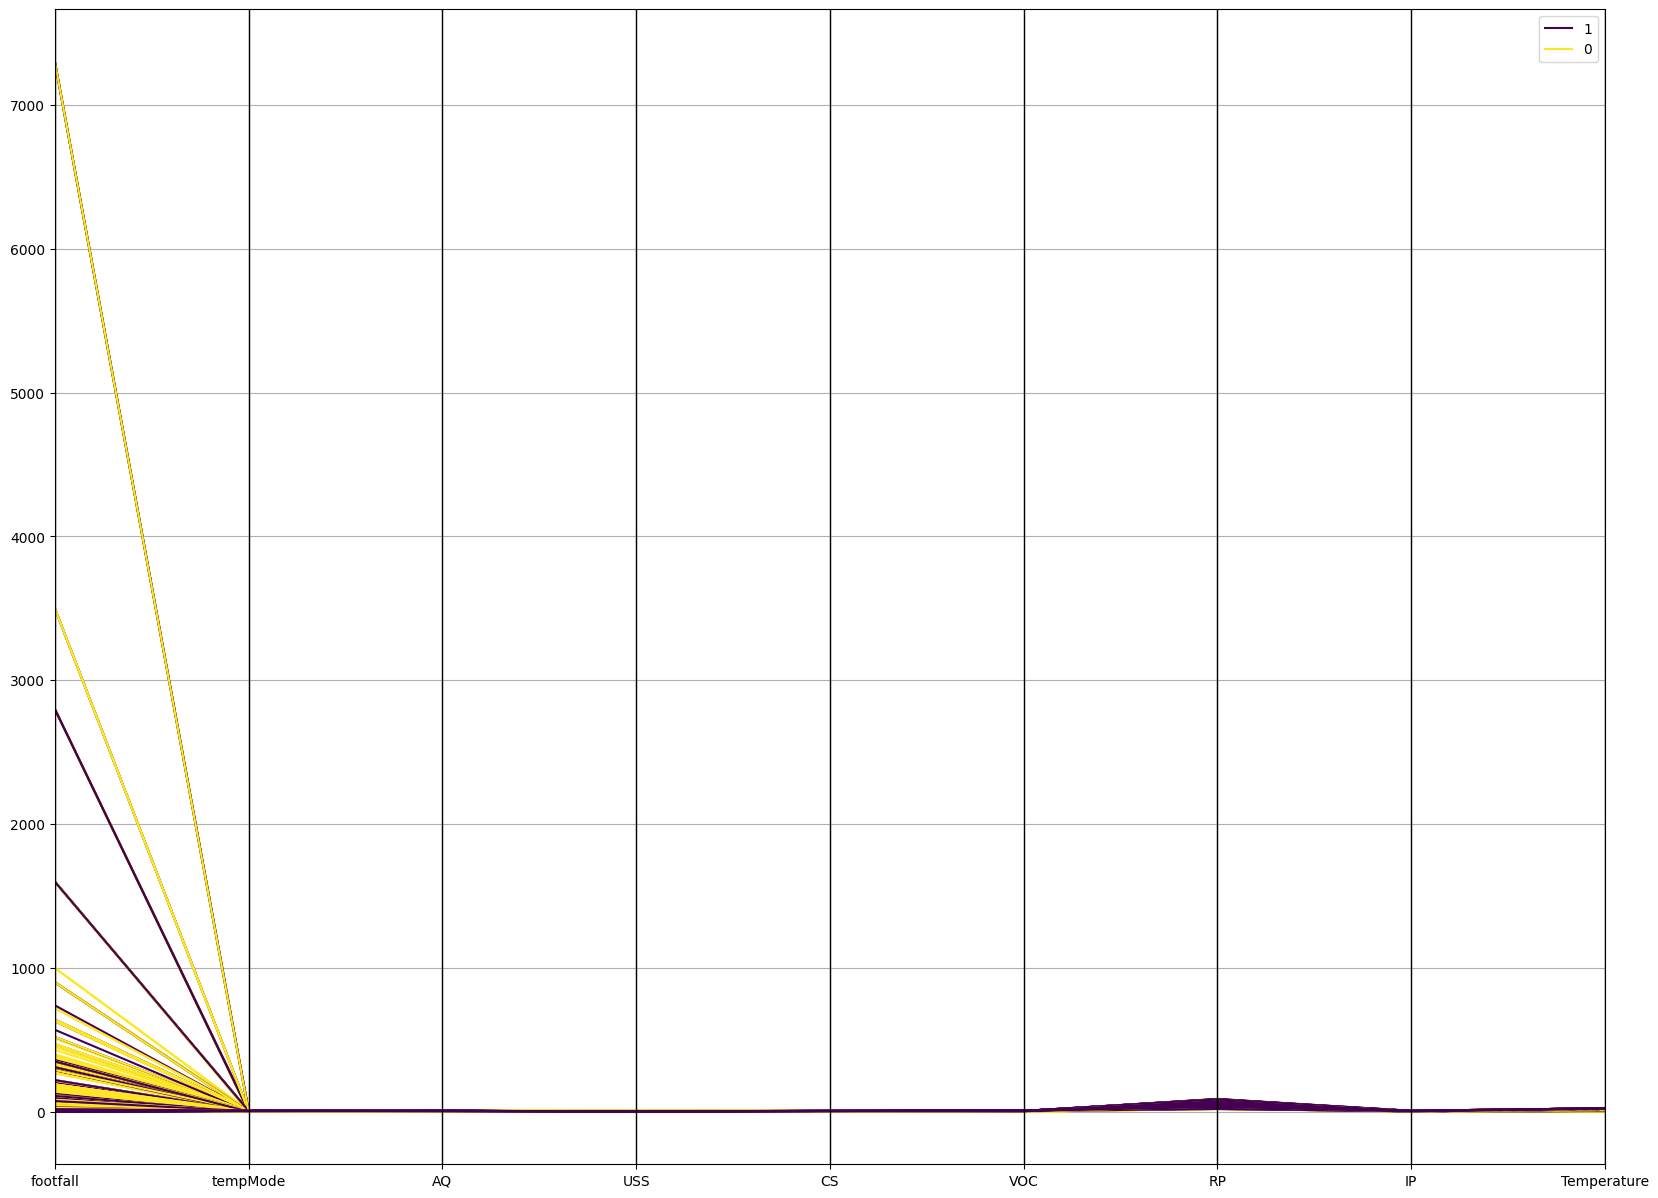

In [ ]:
plt.figure(figsize=(20, 15))
parallel_coordinates(df, 'fail', colormap='viridis')

<Axes: xlabel='AQ', ylabel='footfall'>

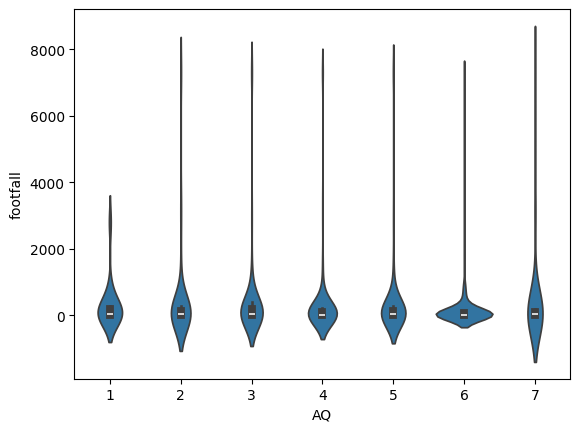

In [ ]:
sns.violinplot(y='footfall', x='AQ', data=df)

<Axes: xlabel='tempMode', ylabel='footfall'>

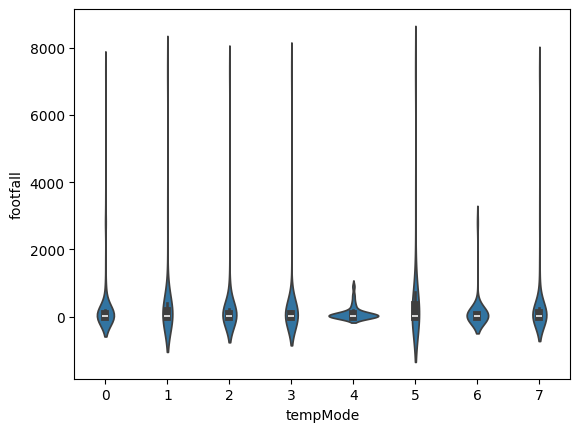

In [ ]:
sns.violinplot(y='footfall', x='tempMode', data=df)

<Axes: xlabel='USS', ylabel='footfall'>

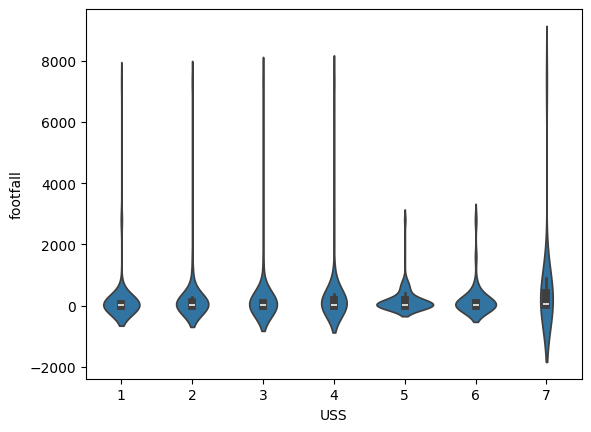

In [ ]:
sns.violinplot(y='footfall', x='USS', data=df)

<Axes: xlabel='CS', ylabel='footfall'>

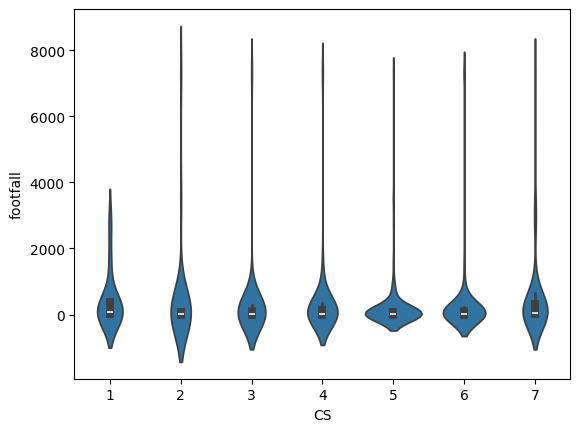

In [ ]:
sns.violinplot(y='footfall', x='CS', data=df)

<Axes: xlabel='VOC', ylabel='footfall'>

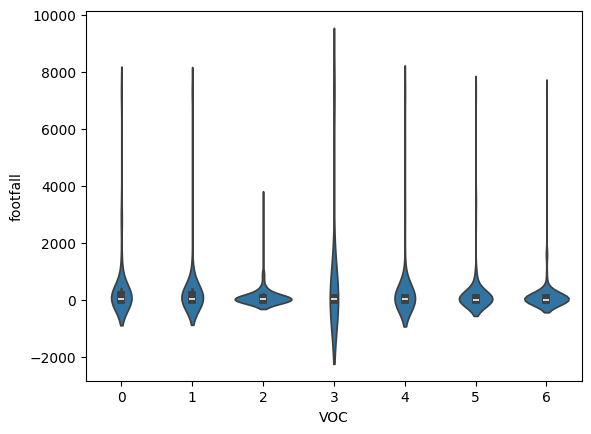

In [ ]:
sns.violinplot(y='footfall', x='VOC', data=df)

<Axes: xlabel='IP', ylabel='footfall'>

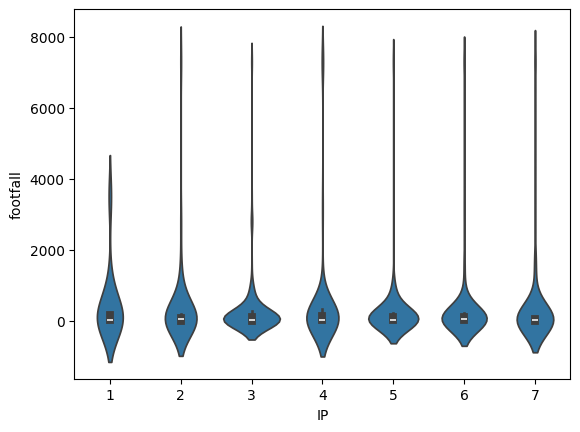

In [ ]:
sns.violinplot(y='footfall', x='IP', data=df)

<Axes: xlabel='fail', ylabel='footfall'>

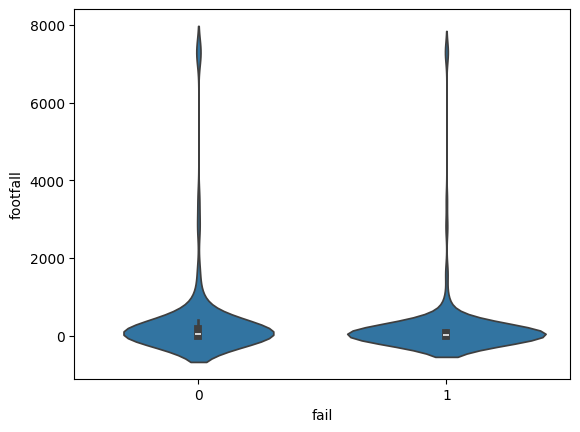

In [ ]:
sns.violinplot(y='footfall', x='fail', data=df)

# Statistical Evaluation

In [ ]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(df)

print("\nChi-square Statistic:", chi2)
print("P-value:", p)


Chi-square Statistic: 255623.75276266987
P-value: 0.0


This suggests a very large chi-square statistic, indicating a significant discrepancy between observed and expected frequencies. The p-value of 0.0 indicates that the observed data provides very strong evidence against the null hypothesis, suggesting a significant relationship between the variables being tested (for a chi-square test of independence) or significant deviation from the expected distribution (for a goodness-of-fit test).

In summary, these results indicate a highly significant finding, where the observed data strongly supports rejecting the null hypothesis in favor of the alternative hypothesis.

# Model Training

Training Logistic Regression (Standardized)...

Results for Logistic Regression (Standardized):
Confusion Matrix:
 [[87 15]
 [10 77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189

Accuracy Score: 0.8677248677248677


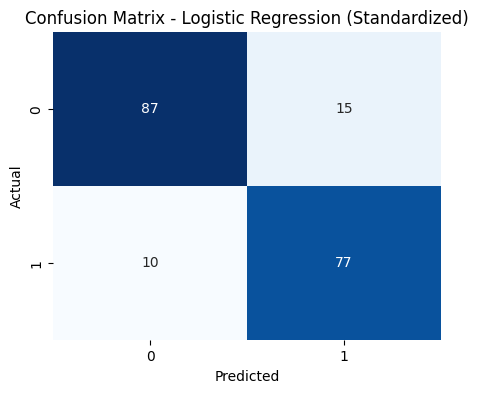

-------------------------------------------------------
Training Decision Tree (Standardized)...

Results for Decision Tree (Standardized):
Confusion Matrix:
 [[80 22]
 [15 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       102
           1       0.77      0.83      0.80        87

    accuracy                           0.80       189
   macro avg       0.80      0.81      0.80       189
weighted avg       0.81      0.80      0.80       189

Accuracy Score: 0.8042328042328042


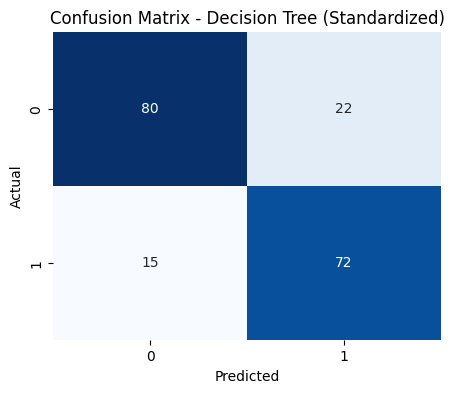

-------------------------------------------------------
Training Random Forest (Standardized)...

Results for Random Forest (Standardized):
Confusion Matrix:
 [[90 12]
 [11 76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189

Accuracy Score: 0.8783068783068783


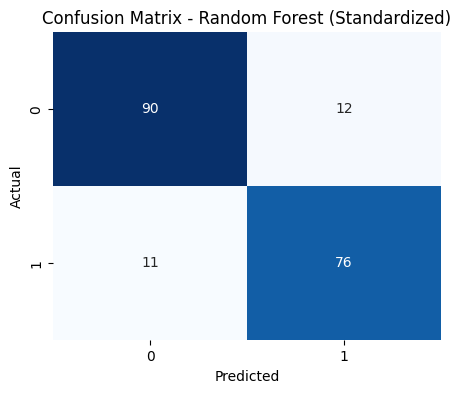

-------------------------------------------------------
Training Logistic Regression (Normalized)...

Results for Logistic Regression (Normalized):
Confusion Matrix:
 [[87 15]
 [ 9 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       102
           1       0.84      0.90      0.87        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.88      0.87      0.87       189

Accuracy Score: 0.873015873015873


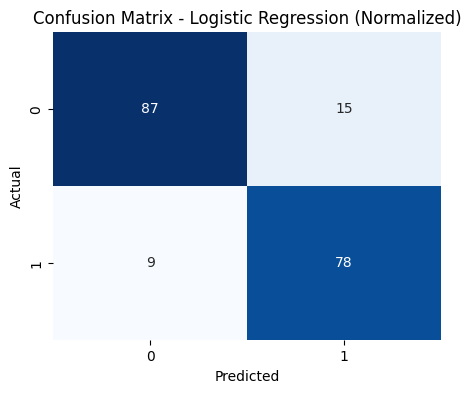

-------------------------------------------------------
Training Decision Tree (Normalized)...

Results for Decision Tree (Normalized):
Confusion Matrix:
 [[81 21]
 [15 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       102
           1       0.77      0.83      0.80        87

    accuracy                           0.81       189
   macro avg       0.81      0.81      0.81       189
weighted avg       0.81      0.81      0.81       189

Accuracy Score: 0.8095238095238095


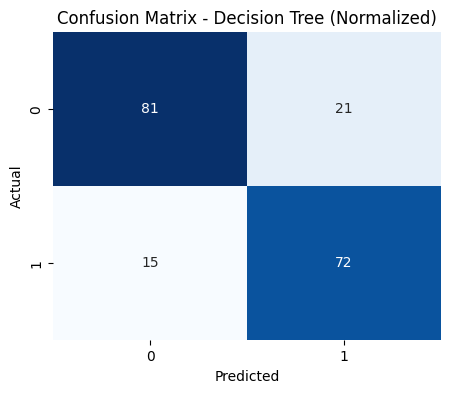

-------------------------------------------------------
Training Random Forest (Normalized)...

Results for Random Forest (Normalized):
Confusion Matrix:
 [[90 12]
 [11 76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189

Accuracy Score: 0.8783068783068783


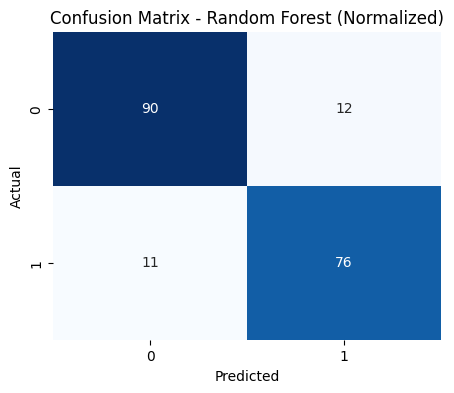

-------------------------------------------------------


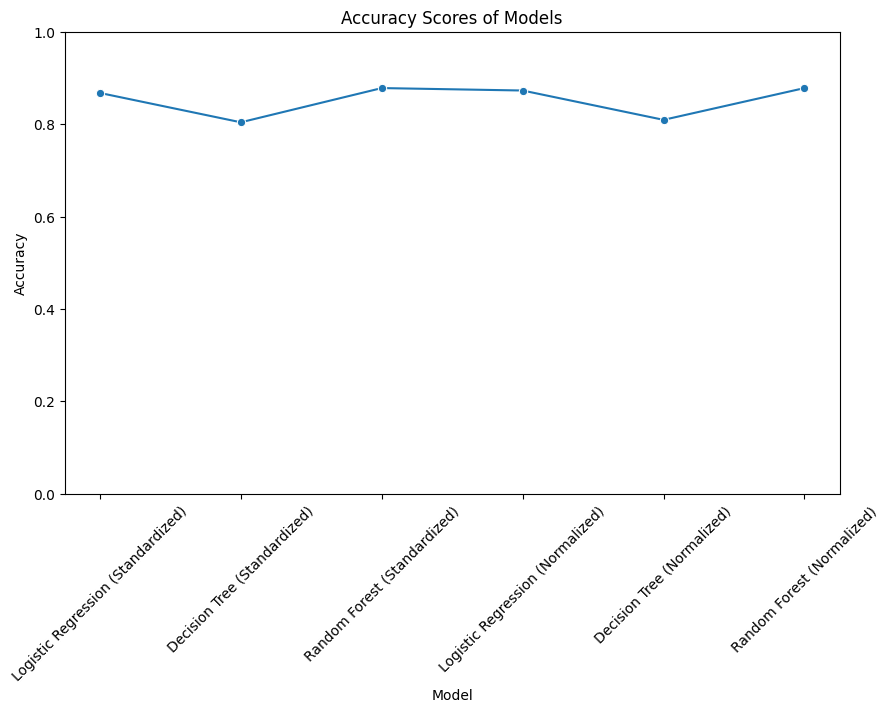

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def analyze_discrete_target(df, target_col):
    """
    Perform analysis on a discrete target variable in a dataframe.

    Parameters:
    - df: DataFrame containing the data
    - target_col: Name of the target column (string)

    Returns:
    - None (prints results and visualizations)
    """
    # Separate target variable
    y = df[target_col]

    # Drop target variable from original dataframe
    df = df.drop([target_col], axis=1)

    # Separate numerical and categorical columns
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()

    # One-hot encode categorical variables
    df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

    # Split data into numerical and categorical dataframes
    X_numerical = df_encoded[numerical_features]
    X_categorical = df_encoded.drop(columns=numerical_features)

    # Standardization
    scaler_standard = StandardScaler()
    X_standardized = scaler_standard.fit_transform(X_numerical)
    X_standardized_df = pd.DataFrame(X_standardized, columns=numerical_features)

    # Normalization
    scaler_minmax = MinMaxScaler()
    X_normalized = scaler_minmax.fit_transform(X_numerical)
    X_normalized_df = pd.DataFrame(X_normalized, columns=numerical_features)

    # Combine scaled numerical features with categorical features
    X_standardized_df = pd.concat([X_standardized_df, X_categorical], axis=1)
    X_normalized_df = pd.concat([X_normalized_df, X_categorical], axis=1)

    # Split scaled data into training and testing sets
    X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)
    X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

    # Initialize classification models
    models = {
        'Logistic Regression (Standardized)': LogisticRegression(),
        'Decision Tree (Standardized)': DecisionTreeClassifier(random_state=42),
        'Random Forest (Standardized)': RandomForestClassifier(random_state=42),
        'Logistic Regression (Normalized)': LogisticRegression(),
        'Decision Tree (Normalized)': DecisionTreeClassifier(random_state=42),
        'Random Forest (Normalized)': RandomForestClassifier(random_state=42)
    }

    # Lists to store model names and their corresponding accuracy scores
    model_names = []
    accuracy_scores = []

    # Iterate through models
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        # Select appropriate data for the model (standardized vs normalized)
        if 'Standardized' in model_name:
            X_train, X_test, y_train, y_test = X_train_std, X_test_std, y_train_std, y_test_std
        elif 'Normalized' in model_name:
            X_train, X_test, y_train, y_test = X_train_norm, X_test_norm, y_train_norm, y_test_norm

        # Fit the model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Model evaluation
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        model_names.append(model_name)

        print(f"\nResults for {model_name}:")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("Accuracy Score:", accuracy)

        # Plot confusion matrix
        plt.figure(figsize=(5, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("-------------------------------------------------------")

    # Plotting accuracy scores
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=model_names, y=accuracy_scores, marker='o', linestyle='-')
    plt.title('Accuracy Scores of Models')
    plt.ylim(0, 1.0)
    plt.xticks(rotation=45)
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.show()


analyze_discrete_target(df, 'fail')

Model Training and Evaluation